findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: Font family 'CMU Serif' not found.
findfont: 

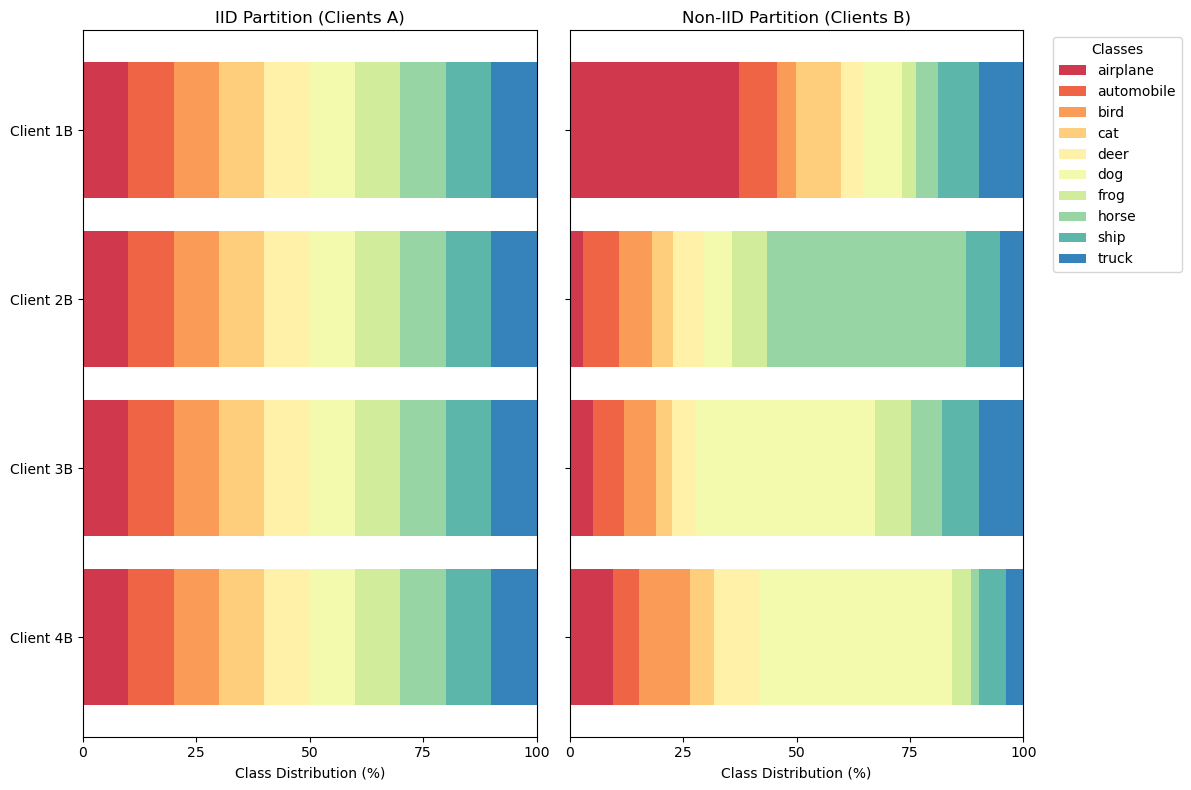

In [5]:
# Importazione delle librerie necessarie
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

rcParams['font.family'] = 'CMU Serif'

# Definizione delle classi e dei dati in percentuale per i Client A e Client B
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# IID distribuzione per i Client A - Ogni classe ha il 10% per ciascun client
clients_a_data_percent = {f"Client {i+1}A": [10] * len(CLASS_NAMES) for i in range(4)}

# Non-IID distribuzione per i Client B, basata sui dati forniti (in percentuale rispetto a 50,000 campioni totali)
total_samples = 50000  # Numero totale di campioni per ciascun client B
non_iid_data = {
    "Client 4B": [4783, 2817, 5634, 2695, 5063, 21158, 2060, 874, 3002, 1914],
    "Client 3B": [2601, 3330, 3549, 1749, 2682, 19766, 3910, 3399, 4157, 4857], 
    "Client 2B": [1420, 3988, 3661, 2357, 3363, 3140, 3793, 21904, 3753, 2621],
    "Client 1B": [18660, 4163, 2153, 4922, 2466, 4233, 1510, 2436, 4532, 4925]

}
non_iid_data_percent = {
    client: [(val / total_samples) * 100 for val in data] 
    for client, data in non_iid_data.items()
}

# Impostazione della figura con due subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

# Mappa di colori per le classi
class_colors = sns.color_palette("Spectral", len(CLASS_NAMES))

# Grafico per i Client A (IID) - Ogni client ha il 10% per classe
for i, (client, data) in enumerate(clients_a_data_percent.items()):
    left = 0  # Punto di partenza per ogni segmento impilato
    for j, percentage in enumerate(data):
        axes[0].barh(i, percentage, left=left, color=class_colors[j], edgecolor='none')
        left += percentage  # Sposta a destra per aggiungere il prossimo segmento

# Configurazione del grafico per i Client A
axes[0].set_title("IID Partition (Clients A)")
axes[0].set_xlim(0, 100)
axes[0].set_xticks([0, 25, 50, 75, 100])
axes[0].set_xlabel("Class Distribution (%)")
axes[0].set_yticks(range(len(clients_a_data_percent)))
axes[0].set_yticklabels(list(clients_a_data_percent.keys()))

# Grafico per i Client B (Non-IID)
for i, (client, data) in enumerate(non_iid_data_percent.items()):
    left = 0  # Punto di partenza per ogni segmento impilato
    for j, percentage in enumerate(data):
        axes[1].barh(i, percentage, left=left, color=class_colors[j], edgecolor='none')
        left += percentage  # Sposta a destra per aggiungere il prossimo segmento

# Configurazione del grafico per i Client B
axes[1].set_title("Non-IID Partition (Clients B)")
axes[1].set_xlim(0, 100)
axes[1].set_xticks([0, 25, 50, 75, 100])
axes[1].set_xlabel("Class Distribution (%)")
axes[1].set_yticks(range(len(non_iid_data_percent)))
axes[1].set_yticklabels(list(non_iid_data_percent.keys()))

# Legenda per i nomi delle classi
plt.legend(CLASS_NAMES, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout finale e visualizzazione
plt.tight_layout()
plt.show()